# Presentación de avance - Martes 30 de Marzo

In [1]:
# Imports
import matplotlib.pyplot as plt
from testing_functions import test_hss
from process_functions import preprocessing_audio_db
from utils import find_and_open_audio, signal_segmentation
from heart_sound_segmentation.filter_and_sampling import downsampling_signal
from IPython.display import Audio

# Parámetros de las funciones
lowpass_params = {'freq_pass': 140, 'freq_stop': 150}       # None
model_name = 'definitive_segnet_based'

# Definición de la frecuencia de muestreo deseada para 
# separación de fuentes
samplerate_des = 11025  # Hz

# Segmentación de sonidos cardiorrespiratorios

In [2]:
# Parámetros base de datos
symptom = 'Pneumonia'
priority = 3
ausc_pos = 'toracic'

# Cargando el archivo de audio 
audio, samplerate = find_and_open_audio(symptom=symptom, 
                                        ausc_pos=ausc_pos, 
                                        priority=priority)

# Ejemplo de la señal cardio respiratoria original
_, audio_dwns = downsampling_signal(audio, samplerate, 
                                    samplerate_des//2-100, 
                                    samplerate_des//2)

Audio(audio_dwns, rate=samplerate_des)

Seleccione el archivo que desea descomponer:
[1] 122_2b1_Al_mc_LittC2SE.wav
[2] 122_2b1_Ar_mc_LittC2SE.wav
[3] 122_2b2_Al_mc_LittC2SE.wav
[4] 122_2b2_Ar_mc_LittC2SE.wav
[5] 122_2b3_Al_mc_LittC2SE.wav
[6] 122_2b3_Ar_mc_LittC2SE.wav
[7] 135_2b1_Al_mc_LittC2SE.wav
[8] 135_2b1_Ar_mc_LittC2SE.wav
[9] 135_2b1_Pl_mc_LittC2SE.wav
[10] 135_2b2_Al_mc_LittC2SE.wav
[11] 135_2b2_Ar_mc_LittC2SE.wav
[12] 135_2b2_Pl_mc_LittC2SE.wav
[13] 135_2b3_Al_mc_LittC2SE.wav
[14] 135_2b3_Ar_mc_LittC2SE.wav
[15] 135_2b3_Pl_mc_LittC2SE.wav
[16] 135_2b3_Pr_mc_LittC2SE.wav
[17] 140_2b2_Ll_mc_LittC2SE.wav
[18] 140_2b3_Ll_mc_LittC2SE.wav
[19] 191_2b1_Pl_mc_LittC2SE.wav
[20] 191_2b1_Pr_mc_LittC2SE.wav
[21] 219_2b1_Ar_mc_LittC2SE.wav
[22] 219_2b2_Ar_mc_LittC2SE.wav
[23] 226_1b1_Pl_sc_LittC2SE.wav
Selección: 5


In [3]:
# Realizando un downsampling para obtener la tasa de muestreo
# fs = 11025 Hz utilizada en la separación de fuentes
_, audio_dwns = downsampling_signal(audio, samplerate, 
                                    samplerate_des//2-100, 
                                    samplerate_des//2)

# Obteniendo la salida de la red
_, y_hat_to, (y_out2, _, _) = \
        signal_segmentation(audio, samplerate, model_name,
                            length_desired=len(audio_dwns),
                            lowpass_params=lowpass_params,
                            plot_outputs=False)

Downsampling de la señal de fs = 44100 Hz a fs = 1000 Hz.
Señal acondicionada a 1000 Hz para la segmentación.
1/1 [==============================] - ETA:  - 0s 4ms/step


<IPython.core.display.Javascript object>


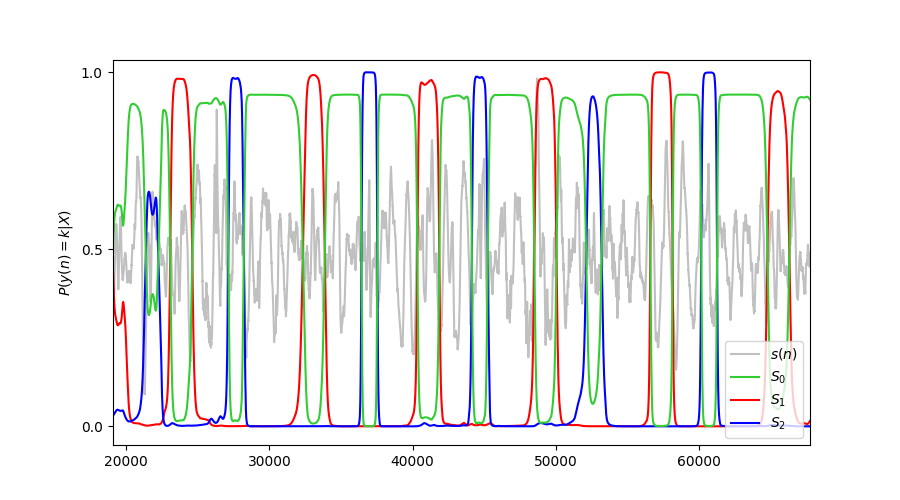

In [4]:
%matplotlib notebook
plt.figure(figsize=(9,5))
audio_data_plot = 0.5 * audio_dwns / max(abs(audio_dwns))
plt.plot(audio_data_plot - min(audio_data_plot), label=r'$s(n)$', 
         color='silver', zorder=0)
plt.plot(y_hat_to[0,:,0], label=r'$S_0$', color='limegreen', zorder=2)
plt.plot(y_hat_to[0,:,1], label=r'$S_1$', color='red', zorder=1)
plt.plot(y_hat_to[0,:,2], label=r'$S_2$', color='blue', zorder=1)
plt.legend(loc='lower right')
plt.yticks([0, 0.5, 1])
plt.ylabel(r'$P(y(n) = k | X)$')
plt.show()

# Separación de sonidos cardio respiratorios

Seleccione el archivo que desea descomponer:
[1] 122_2b1_Al_mc_LittC2SE.wav
[2] 122_2b1_Ar_mc_LittC2SE.wav
[3] 122_2b2_Al_mc_LittC2SE.wav
[4] 122_2b2_Ar_mc_LittC2SE.wav
[5] 122_2b3_Al_mc_LittC2SE.wav
[6] 122_2b3_Ar_mc_LittC2SE.wav
[7] 135_2b1_Al_mc_LittC2SE.wav
[8] 135_2b1_Ar_mc_LittC2SE.wav
[9] 135_2b1_Pl_mc_LittC2SE.wav
[10] 135_2b2_Al_mc_LittC2SE.wav
[11] 135_2b2_Ar_mc_LittC2SE.wav
[12] 135_2b2_Pl_mc_LittC2SE.wav
[13] 135_2b3_Al_mc_LittC2SE.wav
[14] 135_2b3_Ar_mc_LittC2SE.wav
[15] 135_2b3_Pl_mc_LittC2SE.wav
[16] 135_2b3_Pr_mc_LittC2SE.wav
[17] 140_2b2_Ll_mc_LittC2SE.wav
[18] 140_2b3_Ll_mc_LittC2SE.wav
[19] 191_2b1_Pl_mc_LittC2SE.wav
[20] 191_2b1_Pr_mc_LittC2SE.wav
[21] 219_2b1_Ar_mc_LittC2SE.wav
[22] 219_2b2_Ar_mc_LittC2SE.wav
[23] 226_1b1_Pl_sc_LittC2SE.wav
Selección: 5
Downsampling de la señal de fs = 44100 Hz a fs = 1000 Hz.
Señal acondicionada a 1000 Hz para la segmentación.
1/1 [==============================] - ETA:  - 0s 3ms/step
Aplicando separación de fuentes replace_segmen

C:\Users\Chris\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Separación de fuentes completada


<IPython.core.display.Javascript object>


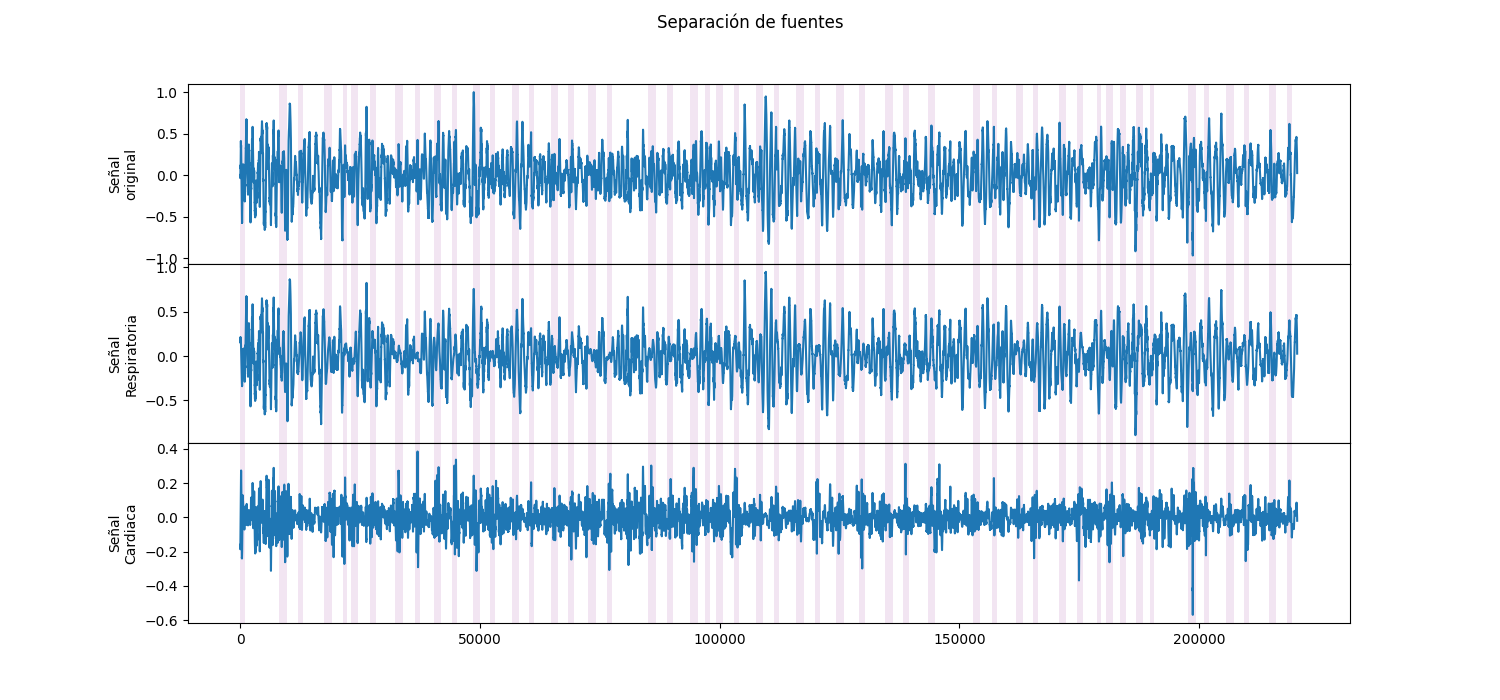

In [5]:
# Definición de los parámetros de filtros pasa bajos de la salida de la red
lowpass_params = {'freq_pass': 140, 'freq_stop': 150}

# Definición de los parámetros NMF
nmf_parameters = {'n_components': 10, 'N': 2048, 'N_lax': 100, 
                  'N_fade': 100, 'noverlap': int(0.9 * 2048), 'repeat': 0, 
                  'padding': 0, 'window': 'hamming', 'init': 'random',
                  'solver': 'mu', 'beta': 2, 'tol': 1e-4, 
                  'max_iter': 500, 'alpha_nmf': 0, 'l1_ratio': 0, 
                  'random_state': 0, 'dec_criteria': 'temp_criterion'}

# Parámetros base de datos
symptom = 'Pneumonia'
priority = 3
ausc_pos = 'toracic'
nmf_method = 'replace_segments'

resp_signal, heart_signal = \
        preprocessing_audio_db(model_name, lowpass_params, symptom,
                                nmf_parameters, ausc_pos=ausc_pos, 
                                priority=priority, nmf_method=nmf_method,
                                plot_segmentation=False,
                                plot_separation=True)

In [6]:
# Ejemplo de la señal cardio respiratoria original
audio, samplerate = find_and_open_audio(symptom=symptom, 
                                        ausc_pos=ausc_pos, 
                                        priority=priority)

_, audio_dwns = downsampling_signal(audio, samplerate, 
                                    samplerate_des//2-100, 
                                    samplerate_des//2)

Audio(audio_dwns, rate=samplerate_des)

Seleccione el archivo que desea descomponer:
[1] 122_2b1_Al_mc_LittC2SE.wav
[2] 122_2b1_Ar_mc_LittC2SE.wav
[3] 122_2b2_Al_mc_LittC2SE.wav
[4] 122_2b2_Ar_mc_LittC2SE.wav
[5] 122_2b3_Al_mc_LittC2SE.wav
[6] 122_2b3_Ar_mc_LittC2SE.wav
[7] 135_2b1_Al_mc_LittC2SE.wav
[8] 135_2b1_Ar_mc_LittC2SE.wav
[9] 135_2b1_Pl_mc_LittC2SE.wav
[10] 135_2b2_Al_mc_LittC2SE.wav
[11] 135_2b2_Ar_mc_LittC2SE.wav
[12] 135_2b2_Pl_mc_LittC2SE.wav
[13] 135_2b3_Al_mc_LittC2SE.wav
[14] 135_2b3_Ar_mc_LittC2SE.wav
[15] 135_2b3_Pl_mc_LittC2SE.wav
[16] 135_2b3_Pr_mc_LittC2SE.wav
[17] 140_2b2_Ll_mc_LittC2SE.wav
[18] 140_2b3_Ll_mc_LittC2SE.wav
[19] 191_2b1_Pl_mc_LittC2SE.wav
[20] 191_2b1_Pr_mc_LittC2SE.wav
[21] 219_2b1_Ar_mc_LittC2SE.wav
[22] 219_2b2_Ar_mc_LittC2SE.wav
[23] 226_1b1_Pl_sc_LittC2SE.wav
Selección: 5


In [12]:
Audio(resp_signal, rate=samplerate_des)

In [5]:
Audio(heart_signal, rate=samplerate_des)